Pn(1.0384615384615385) = 0.5753798661146213
Pn(1.5384615384615385) = 0.06346095167693702
Pn(1.9384615384615385) = -0.21865340262681945

rn(1.0384615384615385) = 4.9781948563421e-09
rn(1.5384615384615385) = -3.9230313442217835e-11
rn(1.9384615384615385) = -1.66610031326897e-09

M: 254015.37460495

Expected deficiency: 2.4883946749229354e-08
Real deficiency on whole interval: 5.350829113126565e-09

Real deficiency on control points: 4.9781948563421e-09


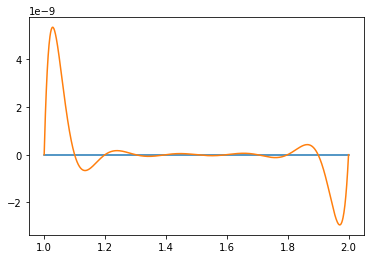

In [5]:
import numpy as np
from math import exp, log, factorial
import matplotlib.pyplot as plt

a = 1.0
b = 2.0
N = 10
delta = (b - a) / N
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def fDerivN1(x):
    return -1 ** (N + 1) * alpha * exp(-x) + (1 - alpha) * (-1 ** N) * factorial(N - 1) / x ** N

def maxDerivN1(samples):
    space = np.linspace(a, b, samples)
    return np.max(np.abs(np.array([(fDerivN1(x)) for x in space], dtype=np.double)))

def omega(k, x):
    global points
    result = 1
    for i in range(N + 1):
        if i != k:
            result *= (x - points[i])
    return result

def denominator(k):
    global points
    result = 1
    for i in range(N + 1):
        if i != k:
            result *= (points[k] - points[i])
    return result

def l(k):
    return lambda x: omega(k, x) / denominator(k)

def LagrangePolynomial(x):
    result = 0
    for i in range(N + 1):
        result += l(i)(x) * f(points[i])
    return result

def deficiency(x):
    return maxDerivN1(10000) * omega(-1, x) / factorial(N + 1)

def plotDifference(samples):
    space = np.linspace(a, b, samples)
    plt.plot(space, np.zeros(np.shape(space)))
    plt.plot(space, np.array([LagrangePolynomial(x) - f(x) for x in space], dtype=np.double))
    plt.savefig("LagrangeDiff.png")
    plt.show()
    
if __name__ == '__main__':

    check = [points[0] + delta / 2.6, 
             points[5] + delta / 2.6,
             points[9] + delta / 2.6]
    
    [print("Pn({0}) = {1}".format(x, LagrangePolynomial(x))) for x in check]
    print()
    [print("rn({0}) = {1}".format(x, LagrangePolynomial(x) - f(x))) for x in check]
    print()

    print("M: " + str(maxDerivN1(10000)))
    print()
    
    print("Expected deficiency: " + 
          str(np.max(np.abs(np.array([(deficiency(x)) for x in check], dtype=np.double)))))
    
    space = np.linspace(a, b, 1000)
    print("Real deficiency on whole interval: " + 
          str(np.max(np.abs(np.array([(LagrangePolynomial(x) - f(x)) for x in space], dtype=np.double)))))
    print()
    
    print("Real deficiency on control points: " + 
          str(np.max(np.abs(np.array([(LagrangePolynomial(x) - f(x)) for x in check], dtype=np.double)))))
    
    plotDifference(1000)